# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv


# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

artist = '2YZyLoL8N0Wb9xBt1NhZWg'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)) 
results = spotify.artist_top_tracks(artist)

In [7]:
canciones = []
popularidad = []
duracion = []

for tracks in results['tracks'][:10]:
    print(tracks['name'], '-', tracks['popularity'])
    canciones.append(tracks['name'])
    popularidad.append(tracks['popularity'])
    duracion.append(tracks['duration_ms']/(1000*60)%60)

luther (with sza) - 89
tv off (feat. lefty gunplay) - 91
Not Like Us - 90
squabble up - 88
All The Stars (with SZA) - 88
30 For 30 (with Kendrick Lamar) - 86
Money Trees - 78
HUMBLE. - 84
Like That - 84
peekaboo (feat. azchike) - 83


In [9]:
df=pd.DataFrame({'cancion':canciones, 'popularidad':popularidad, 'duracion':duracion})
df


,cancion,popularidad,duracion
0,luther (with sza),89,2.959967
1,tv off (feat. lefty gunplay),91,3.678167
2,Not Like Us,90,4.569867
3,squabble up,88,2.633200
4,All The Stars (with SZA),88,3.869767
5,30 For 30 (with Kendrick Lamar),86,4.637933
6,Money Trees,78,6.448433
7,HUMBLE.,84,2.950000
8,Like That,84,4.461767
9,peekaboo (feat. azchike),83,2.598617


In [11]:
df_popular = df.sort_values(by='popularidad', ascending=False)
df_popular

,cancion,popularidad,duracion
1,tv off (feat. lefty gunplay),91,3.678167
2,Not Like Us,90,4.569867
0,luther (with sza),89,2.959967
3,squabble up,88,2.633200
4,All The Stars (with SZA),88,3.869767
5,30 For 30 (with Kendrick Lamar),86,4.637933
7,HUMBLE.,84,2.950000
8,Like That,84,4.461767
9,peekaboo (feat. azchike),83,2.598617
6,Money Trees,78,6.448433


In [18]:
df_popular.head(3)

,cancion,popularidad,duracion
1,tv off (feat. lefty gunplay),91,3.678167
2,Not Like Us,90,4.569867
0,luther (with sza),89,2.959967


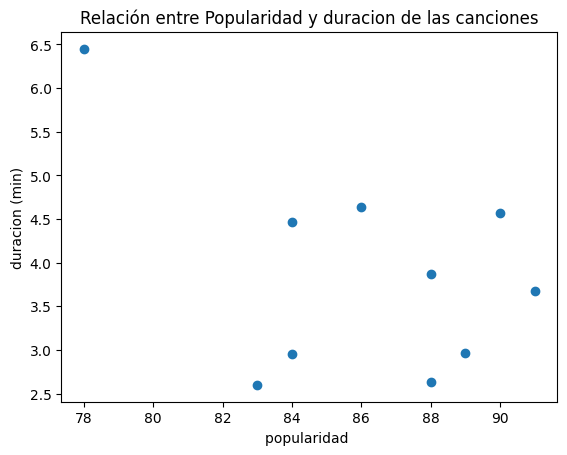

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df['popularidad'], df['duracion']);
plt.xlabel('popularidad ');
plt.ylabel('duracion (min)');
plt.title('Relación entre Popularidad y duracion de las canciones');

plt.show();

el scatterplot nos indica que la cancion menos popular es la mas larga en min , esto me indica que si hay una relacion de baja popularidad a la cancion mas larga , pero la cancion mas popular tiene una duracion intermedia lo cual creo que al no ser la mas corta pero tampoco la mas larga le da un tiempo optimo para gustar al publico